<a href="https://colab.research.google.com/github/myndaaa/Natural-Language-Processing/blob/main/FNLP_Tutorial3_TFIDF_2024_mysha_nahiyan_shemontee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COS30018 FNLP Tutorial 3**

##**Lab Task Submission at bottom #PassTask2**
## **Name:Mysha Nahiyan Shemontee**
## **Student ID:102773618 **

#**Math with words (TF-IDF vectors)**

####Bags of words
Vectors of word counts or frequencies

Let’s look at an example where counting occurrences of words is useful:

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
sentence = """The faster Harry got to the store, the faster Harry,
... the faster, would get home."""

In [ ]:
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(sentence.lower())
tokens

['the',
 'faster',
 'harry',
 'got',
 'to',
 'the',
 'store',
 ',',
 'the',
 'faster',
 'harry',
 ',',
 '...',
 'the',
 'faster',
 ',',
 'would',
 'get',
 'home',
 '.']

With your simple list, you want to get unique words from the document and their
counts. A Python dictionary serves this purpose nicely, and because you want to count the words as well, you can use Counter, as you did in previous chapters:

In [ ]:
from collections import Counter
bag_of_words = Counter(tokens)
bag_of_words

Counter({'the': 4,
         'faster': 3,
         'harry': 2,
         'got': 1,
         'to': 1,
         'store': 1,
         ',': 3,
         '...': 1,
         'would': 1,
         'get': 1,
         'home': 1,
         '.': 1})

So let’s get these words ranked—sorted in some order that’s easier to think about. The Counter object has a handy method, most_common, for just this purpose

In [ ]:
bag_of_words.most_common(4)

[('the', 4), ('faster', 3), (',', 3), ('harry', 2)]

Let’s calculate the term frequency of “harry” from the Counter object (bag_of_words) you defined above:

In [ ]:
times_harry_appears = bag_of_words['harry']
num_unique_words = len(bag_of_words)
tf = times_harry_appears / num_unique_words
round(tf, 4)

0.1667

Let’s look at a bigger piece of text. Take these first few paragraphs
from the Wikipedia article on kites:

A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react Against the air to create lift and drag. A kite consists of wings, tethers, and anchors. Kites often have a bridle to guide the face of the kite at the correct angle so the wind can lift it. A kite’s wing also may be so designed so a bridle is not needed; when kiting a sailplane for launch, the tether meets the wing at a single point. A kite may
have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is still often called the kite. The lift that sustains the kite in flight is generated when air flows around the kite’s surface, producing low pressure above and high pressure below the wings. The interaction with the wind also generates horizontal drag along the direction of the wind. The resultant force vector from the lift and drag force components is opposed
by the tension of one or more of the lines or tethers to which the kite is attached. The anchor point of the kite line may be static or moving (such as the towing of a kite by a running person, boat, free-falling anchors as in paragliders and fugitive parakites or vehicle). The same principles of fluid flow apply in liquids and kites are also used under water. A hybrid tethered craft comprising both a lighter-than-air balloon as well as a kite lifting surface is called a kytoon.

Assign the text to a variable:

In [ ]:
!pip install nlpia

In [ ]:
import numpy as np
np. __version__

'1.25.2'

In [ ]:

from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
from nlpia.data.loaders import kite_text
tokens = tokenizer.tokenize(kite_text.lower())
token_counts = Counter(tokens)
token_counts

ImportError: cannot import name 'Mapping' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

Stopwords; "the", "a", "and"

In [ ]:
import nltk
nltk.download('stopwords', quiet=True)
stopwords = nltk.corpus.stopwords.words('english')
tokens = [x for x in tokens if x not in stopwords]
kite_counts = Counter(tokens)
kite_counts

Counter({'faster': 3,
         'harry': 2,
         'got': 1,
         'store': 1,
         ',': 3,
         '...': 1,
         'would': 1,
         'get': 1,
         'home': 1,
         '.': 1})

### Vectorizing

Instead of describing a document in terms of a frequency dictionary, you’ll make a vector of those word counts. In Python, this will be a list, but in general it’s an ordered collection or array. You can do this quickly with most_common()

In [ ]:
document_vector = []
doc_length = len(tokens)
for key, value in kite_counts.most_common():
  document_vector.append(value / doc_length)
document_vector

[0.2,
 0.2,
 0.13333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667]

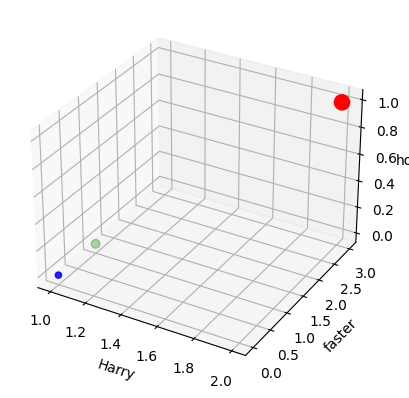

In [ ]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from nltk.tokenize import TreebankWordTokenizer

sentence = "The faster Harry got to the store, the faster and faster Harry would get home."
tokenizer = TreebankWordTokenizer()
tokenize = tokenizer.tokenize
token_sequence = tokenize(sentence)

lexicon = ['faster', 'Harry', 'home']
vector1 = Counter(tok for tok in tokenize("The faster Harry got to the store, the faster and faster Harry would get home.") if tok in lexicon)
vector2 = Counter(tok for tok in tokenize("Jill is faster than Harry.") if tok in lexicon)
vector3 = Counter(tok for tok in tokenize("Jill and Harry fast.") if tok in lexicon)
corpus = [vector1, vector2, vector3]

corpus
# [Counter({'Harry': 2, 'faster': 3, 'home': 1}),
#  Counter({'Harry': 1, 'faster': 1}),
#  Counter()]

df = pd.DataFrame.from_records(corpus)
df = df.fillna(0)
df
#    Harry  faster  home
# 0    2.0     3.0   1.0
# 1    1.0     1.0   0.0
# 2    1.0     0.0   0.0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df.Harry, df.faster, df.home, s=20 * df.T.sum(), c=list('rgb'))
plt.xlabel('Harry')
plt.ylabel('faster')
ax.set_zlabel('home')
plt.show()

If you have two documents, you’ll find every unique word in each document and then find every unique word in the union of those two sets. This collections of words in your vocabulary is often called a lexicon, which is the same concept referenced in earlier chapters, just in terms of your special corpus

In [ ]:
docs = ["The faster Harry got to the store, the faster and faster Harry would get home."]
docs.append("Harry is hairy and faster than Jill.")
docs.append("Jill is not as hairy as Harry.")

In [ ]:
doc_tokens = []
for doc in docs:
  doc_tokens += [sorted(tokenizer.tokenize(doc.lower()))]
len(doc_tokens[0])

17

In [ ]:
all_doc_tokens = sum(doc_tokens, [])
len(all_doc_tokens)

33

In [ ]:
lexicon = sorted(set(all_doc_tokens))
len(lexicon)

18

Each of your three document vectors will need to have 18 values, even if the document
for that vector doesn’t contain all 18 words in your lexicon. Each token is
assigned a “slot” in your vectors corresponding to its position in your lexicon. Some of
those token counts in the vector will be zeros, which is what you want:

In [ ]:
from collections import OrderedDict
zero_vector = OrderedDict((token, 0) for token in lexicon)
zero_vector

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

Now you’ll make copies of that base vector, update the values of the vector for each document, and store them in an array:

In [ ]:
import copy
doc_vectors = []
for doc in docs:
  vec = copy.copy(zero_vector)
  tokens = tokenizer.tokenize(doc.lower())
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    vec[key] = value / len(lexicon)
    doc_vectors.append(vec)

In [ ]:
doc_vectors

[OrderedDict([(',', 0.05555555555555555),
              ('.', 0.05555555555555555),
              ('and', 0.05555555555555555),
              ('as', 0),
              ('faster', 0.16666666666666666),
              ('get', 0.05555555555555555),
              ('got', 0.05555555555555555),
              ('hairy', 0),
              ('harry', 0.1111111111111111),
              ('home', 0.05555555555555555),
              ('is', 0),
              ('jill', 0),
              ('not', 0),
              ('store', 0.05555555555555555),
              ('than', 0),
              ('the', 0.16666666666666666),
              ('to', 0.05555555555555555),
              ('would', 0.05555555555555555)]),
 OrderedDict([(',', 0.05555555555555555),
              ('.', 0.05555555555555555),
              ('and', 0.05555555555555555),
              ('as', 0),
              ('faster', 0.16666666666666666),
              ('get', 0.05555555555555555),
              ('got', 0.05555555555555555),
              ('hair

###Zipf’s Law

Zipf’s law states that given some corpus of natural language utterances, the
frequency of any word is inversely proportional to its rank in the frequency table.

In [ ]:
nltk.download('brown')
from nltk.corpus import brown
brown.words()[:10]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [ ]:
brown.tagged_words()[:5]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL')]

In [ ]:
len(brown.words())

1161192

In [ ]:
#So with over 1 million tokens, you have something meaty to look at:

from collections import Counter
puncs = set((',', '.', '--', '-', '!', '?',':', ';', '``', "''", '(', ')', '[', ']'))
word_list = (x.lower() for x in brown.words() if x not in puncs)
token_counts = Counter(word_list)
token_counts.most_common(5)

[('the', 69971), ('of', 36412), ('and', 28853), ('to', 26158), ('a', 23195)]

A quick glance shows that the word frequencies in the Brown corpus follow the logarithmic relationship Zipf predicted. “The” (rank 1 in term frequency) occurs roughly twice as often as “of” (rank 2 in term frequency), and roughly three times as often as “and” (rank 3 in term frequency).

## Topic modelling

Inverse document frequency, or IDF, is your window through Zipf in topic analysis.Let’s take your term frequency counter from earlier and expand on it. You can count tokens and bin them up two ways: per document and across the entire corpus. You’re going to be counting just by document.

First let’s get the total word count for each document in your corpus, intro_doc and history_doc:

In [ ]:
from nlpia.data.loaders import kite_text, kite_history
kite_intro = kite_text.lower()
intro_tokens = tokenizer.tokenize(kite_intro)
kite_history = kite_history.lower()
history_tokens = tokenizer.tokenize(kite_history)
intro_total = len(intro_tokens)

intro_total

ImportError: cannot import name 'Mapping' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [ ]:
history_total = len(history_tokens)
history_total

NameError: name 'history_tokens' is not defined

In [ ]:
intro_tf = {}
history_tf = {}
intro_counts = Counter(intro_tokens)
intro_tf['kite'] = intro_counts['kite'] / intro_total

history_counts = Counter(history_tokens)
history_tf['kite'] = history_counts['kite'] / history_total
'Term Frequency of "kite" in intro is: {:.4f}'.format(intro_tf['kite'])

NameError: name 'intro_tokens' is not defined

In [ ]:
'Term Frequency of "kite" in history is: {:.4f}'.format(history_tf['kite'])

KeyError: 'kite'

One TF is twice another. Does the intro mention more about kites than the history? Not exactly. Lets look deeper. First, let’s see how those numbers
relate to some other word, say “and”:

In [ ]:
intro_tf['and'] = intro_counts['and'] / intro_total
history_tf['and'] = history_counts['and'] / history_total
print('Term Frequency of "and" in intro is: {:.4f}'.format(intro_tf['and']))

NameError: name 'intro_counts' is not defined

In [ ]:
print('Term Frequency of "and" in history is: {:.4f}'.format(history_tf['and']))

KeyError: 'and'

You know both of these documents are about “and” just as much as they are about “kite”

term’s IDF is merely the ratio of the total number of documents to the number
of documents the term appears in. In the case of “and” and “kite” in your current
example, the answer is the same for both:


*   2 total documents / 2 documents contain “and” = 2/2 = 1
*   2 total documents / 2 documents contain “kite” = 2/2 = 1
*   Not very interesting. So let’s look at another word “China.”
*   2 total documents / 1 document contains “China” = 2/1 = 2

Okay, that’s something different. Let’s use this “rarity” measure to weight the term frequencies:

In [ ]:
num_docs_containing_and = 0
num_docs_containing_kite = 0
num_docs_containing_china = 0

for doc in [intro_tokens, history_tokens]:
  if 'and' in doc:
    num_docs_containing_and += 1
  if 'china' in doc:
    num_docs_containing_china += 1
  if 'kite' in doc:
    num_docs_containing_kite += 1

NameError: name 'intro_tokens' is not defined

And let’s grab the TF of “China” in the two documents:

In [ ]:
intro_tf['china'] = intro_counts['china'] / intro_total
history_tf['china'] = history_counts['china'] / history_total

NameError: name 'intro_counts' is not defined

And finally, the IDF for all three. You’ll store the IDFs in dictionaries per document
like you did with TF:

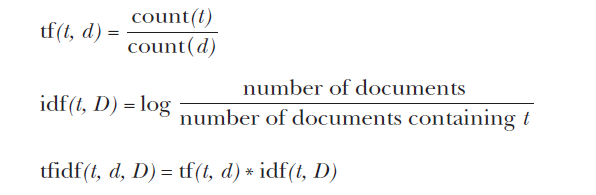

In [ ]:
num_docs = 2
intro_idf = {}
history_idf = {}
intro_idf['and'] = num_docs / num_docs_containing_and
history_idf['and'] = num_docs / num_docs_containing_and
intro_idf['kite'] = num_docs / num_docs_containing_kite
history_idf['kite'] = num_docs / num_docs_containing_kite
intro_idf['china'] = num_docs / num_docs_containing_china
history_idf['china'] = num_docs / num_docs_containing_china

ZeroDivisionError: division by zero

In [ ]:
intro_tfidf = {}
intro_tfidf['and'] = intro_tf['and'] * intro_idf['and']
intro_tfidf['kite'] = intro_tf['kite'] * intro_idf['kite']
intro_tfidf['china'] = intro_tf['china'] * intro_idf['china']

KeyError: 'and'

In [ ]:
history_tfidf = {}
history_tfidf['and'] = history_tf['and'] * history_idf['and']
history_tfidf['kite'] = history_tf['kite'] * history_idf['kite']
history_tfidf['china'] = history_tf['china'] * history_idf['china']

KeyError: 'and'

In [ ]:
history_tfidf['and']

KeyError: 'and'

In [ ]:
history_tfidf['kite']

KeyError: 'kite'

In [ ]:
history_tfidf['china']

KeyError: 'china'

As you saw earlier, you can easily compare two vectors and get their similarity, but you
have since learned that merely counting words isn’t as descriptive as using their TFIDF.
Therefore, in each document vector let’s replace each word’s word_count with
the word’s TF-IDF. Now your vectors will more thoroughly reflect the meaning, or
topic, of the document, as shown in this Harry example:

## Relevance Ranking

In [ ]:
document_tfidf_vectors = []
for doc in docs:
  vec = copy.copy(zero_vector)
  tokens = tokenizer.tokenize(doc.lower())
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    docs_containing_key = 0
    for _doc in docs:
      if key in _doc:
        docs_containing_key += 1
      tf = value / len(lexicon)
      if docs_containing_key:
        idf = len(docs) / docs_containing_key
      else:
        idf = 0
      vec[key] = tf * idf
    document_tfidf_vectors.append(vec)

In [ ]:
document_tfidf_vectors

[OrderedDict([(',', 0.16666666666666666),
              ('.', 0.05555555555555555),
              ('and', 0.08333333333333333),
              ('as', 0),
              ('faster', 0.25),
              ('get', 0.16666666666666666),
              ('got', 0.16666666666666666),
              ('hairy', 0),
              ('harry', 0.0),
              ('home', 0.16666666666666666),
              ('is', 0),
              ('jill', 0),
              ('not', 0),
              ('store', 0.16666666666666666),
              ('than', 0),
              ('the', 0.5),
              ('to', 0.16666666666666666),
              ('would', 0.16666666666666666)]),
 OrderedDict([(',', 0.16666666666666666),
              ('.', 0.05555555555555555),
              ('and', 0.08333333333333333),
              ('as', 0),
              ('faster', 0.25),
              ('get', 0.16666666666666666),
              ('got', 0.16666666666666666),
              ('hairy', 0),
              ('harry', 0.0),
              ('home', 

K-dimensional vector representation of each document in
the corpus. And now on to the hunt! Or search, in your case. Two vectors, in a given
vector space, can be said to be similar if they have a similar angle. If you imagine each
vector starting at the origin and reaching out its prescribed distance and direction,
the ones that reach out at the same angle are similar, even if they don’t reach out to
the same distance.

###Cosine similarity

Two vectors are considered similar if their cosine similarity is high, so you can find
two similar vectors near each other if they minimize:

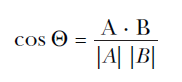

In [ ]:
import math
def cosine_sim(vec1, vec2):
  """ Let's convert our dictionaries to lists for easier matching."""
  vec1 = [val for val in vec1.values()]
  vec2 = [val for val in vec2.values()]

  dot_prod = 0
  for i, v in enumerate(vec1):
    dot_prod += v * vec2[i]
  mag_1 = math.sqrt(sum([x**2 for x in vec1]))
  mag_2 = math.sqrt(sum([x**2 for x in vec2]))
  return dot_prod / (mag_1 * mag_2)

In [ ]:
document_tfidf_vectors = []
for doc in docs:
  vec = copy.copy(zero_vector)
  tokens = tokenizer.tokenize(doc.lower())
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    docs_containing_key = 0
    for _doc in docs:
      if key in _doc:
        docs_containing_key += 1
    tf = value / len(lexicon)
    if docs_containing_key:
      idf = len(docs) / docs_containing_key
    else:
      idf = 0
    vec[key] = tf * idf
  document_tfidf_vectors.append(vec)

If you take your three documents about Harry, and make the query “How long does it take to get to the store?” as shown here you can safely say document 0 has the most relevance for your query! And with this
you can find relevant documents in any corpus, be it articles in Wikipedia, books from
Gutenberg, or tweets from the wild west that is Twitter. Google look out!

In [ ]:
zero_vector

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

In [ ]:
query = "How long does it take to get to the store?"
query_vec = copy.copy(zero_vector)
query_vec = copy.copy(zero_vector)

In [ ]:
docs[0]

'The faster Harry got to the store, the faster and faster Harry would get home.'

In [ ]:
query_vec

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0),
             ('than', 0),
             ('the', 0),
             ('to', 0),
             ('would', 0)])

In [ ]:
tokens = tokenizer.tokenize(query.lower())
token_counts = Counter(tokens)
for key, value in token_counts.items():
  docs_containing_key = 0
  for _doc in docs:
    if key in _doc.lower():
      docs_containing_key += 1
  if docs_containing_key == 0:
    continue
  tf = value / len(tokens)
  idf = len(docs) / docs_containing_key
  query_vec[key] = tf * idf



In [ ]:
cosine_sim(query_vec, document_tfidf_vectors[0])

0.6132857433407973

In [ ]:
cosine_sim(query_vec, document_tfidf_vectors[1])

0.0

In [ ]:
cosine_sim(query_vec, document_tfidf_vectors[2])

0.0

In [ ]:
query_vec

OrderedDict([(',', 0),
             ('.', 0),
             ('and', 0),
             ('as', 0),
             ('faster', 0),
             ('get', 0.2727272727272727),
             ('got', 0),
             ('hairy', 0),
             ('harry', 0),
             ('home', 0),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0.2727272727272727),
             ('than', 0),
             ('the', 0.2727272727272727),
             ('to', 0.5454545454545454),
             ('would', 0)])

In [ ]:
document_tfidf_vectors[0]

OrderedDict([(',', 0.16666666666666666),
             ('.', 0.05555555555555555),
             ('and', 0.08333333333333333),
             ('as', 0),
             ('faster', 0.25),
             ('get', 0.16666666666666666),
             ('got', 0.16666666666666666),
             ('hairy', 0),
             ('harry', 0.0),
             ('home', 0.16666666666666666),
             ('is', 0),
             ('jill', 0),
             ('not', 0),
             ('store', 0.16666666666666666),
             ('than', 0),
             ('the', 0.5),
             ('to', 0.16666666666666666),
             ('would', 0.16666666666666666)])

# SKLEARN & MOVIE RECOMMENDATION SHOWCASE

You will need this zip file: "wiki_movie_plots_deduped.csv.zip"

You can download it from here:
https://www.kaggle.com/jrobischon/wikipedia-movie-plots/version/1

I suggest uploading the zip file onto google drive

If !unzip below fails and returns the error then execute the next code.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/NLP/wiki.zip"

Archive:  /content/drive/My Drive/NLP/wiki.zip
  inflating: wiki_movie_plots_deduped.csv  


Execute below only if unzip above fails

In [ ]:
# Python program to explain shutil.unpack_archive() method
# importing shutil module
import shutil

# Full path of
# the archive file
filename = "/content/drive/My Drive/NLP/wiki.zip"

# Target directory
extract_dir = "/content/drive/My Drive/NLP"

# Format of archive file
archive_format = "zip"

# Unpack the archive file
shutil.unpack_archive(filename, extract_dir, archive_format)
print("Archive file unpacked successfully.")

In [ ]:
# Give the location of the dataset
path_dataset ="wiki_movie_plots_deduped.csv"

import pandas as pd
data = pd.read_csv(path_dataset)
data.head()

In [ ]:

len(data)

import numpy as np
print(np.unique(data['Origin/Ethnicity']))

print(len(data.loc[data['Origin/Ethnicity']=='American']))
print(len(data.loc[data['Origin/Ethnicity']=='British']))

In [ ]:
# Concatenating American and British movies
df1 = pd.DataFrame(data.loc[data['Origin/Ethnicity']=='American'])
df2 = pd.DataFrame(data.loc[data['Origin/Ethnicity']=='British'])
data = pd.concat([df1, df2], ignore_index = True)

len(data)

finaldata = data[["Title", "Plot"]]          # Required columns - Title and movie plot
finaldata = finaldata.set_index('Title')    # Setting the movie title as index

finaldata.head(10)
finaldata["Plot"][0]

In [ ]:
finaldata

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

*Code below may take 10 mins:*

In [ ]:

def preprocess_sentences(text):
  text = text.lower()
  temp_sent =[]
  words = nltk.word_tokenize(text)
  tags = nltk.pos_tag(words)
  for i, word in enumerate(words):
      if tags[i][1] in VERB_CODES:
          lemmatized = lemmatizer.lemmatize(word, 'v')
      else:
          lemmatized = lemmatizer.lemmatize(word)
      if lemmatized not in stop_words and lemmatized.isalpha():
          temp_sent.append(lemmatized)

  finalsent = ' '.join(temp_sent)
  finalsent = finalsent.replace("n't", " not")
  finalsent = finalsent.replace("'m", " am")
  finalsent = finalsent.replace("'s", " is")
  finalsent = finalsent.replace("'re", " are")
  finalsent = finalsent.replace("'ll", " will")
  finalsent = finalsent.replace("'ve", " have")
  finalsent = finalsent.replace("'d", " would")
  return finalsent

finaldata["plot_processed"]= finaldata["Plot"].apply(preprocess_sentences)
finaldata.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_movieid2 = tfidfvectorizer.fit_transform((finaldata["plot_processed"]))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing pre-processed movie plots using TF-IDF
tfidfvec = TfidfVectorizer()
tfidf_movieid = tfidfvec.fit_transform((finaldata["plot_processed"]))

# Finding cosine similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_movieid, tfidf_movieid)

In [ ]:
count_movieid2 = countvectorizer.fit_transform((finaldata["plot_processed"]))


In [ ]:
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

In [ ]:
tfidfvec.get_feature_names_out()

In [ ]:
count_tokens

In [ ]:
tfidf_tokens

In [ ]:
tfidf_movieid2

In [ ]:
tfidf_movieid


In [ ]:
len(cos_sim)

In [ ]:
# Storing indices of the data
indices = pd.Series(finaldata.index)

def recommendations(title, cosine_sim = cos_sim):
    recommended_movies = []
    index = indices[indices == title].index[0]
    similarity_scores = pd.Series(cosine_sim[index]).sort_values(ascending = False)
    top_10_movies = list(similarity_scores.iloc[1:11].index)
    for i in top_10_movies:
        recommended_movies.append(list(finaldata.index)[i])
    return recommended_movies

In [ ]:
indices

In [ ]:
recommendations("Kansas")


# Lab Submission 2 (Due Sunday Week 4, 11:59 PM)

1. Attempt to use what you've learned to perform TF-IDF on the stories dataset. Select at least two documents (txt). You can use sklearn, nltk and any other libraries. Explain any findings can you obtain

Make sure at the bare minimum to show the following:
*   Remove stopwords
*   Remove punctuations
*   Show top rankings (IF POSSIBLE)
*   Show TF-IDF values of words




In [ ]:
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import PorterStemmer

#preprocessing
list_of_symbols = ["™","®","©","&trade;","&reg;","&copy;","&#8482;","&#174;","&#169;","\n"]

def textpreprocessing(textprocess):
    """
    Function to clean and preprocess list of text
    :param list of words:
    :return: List of cleaned words
    """

    #remove punctuations n symbols
    text_to_process = "".join([char for char in textprocess if char not in string.punctuation])

    for symbol in list_of_symbols:
        text_to_process = text_to_process.replace(symbol," ")

    #remove unicode
    text_to_process = text_to_process.encode("ascii", "ignore")
    text_to_process = text_to_process.decode()

    tokenizer = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')

    tokenize_list_words = tokenizer.tokenize(text_to_process)

    ps = PorterStemmer()

    for item in tokenize_list_words:
        ps.stem(item)
        if item in stopwords.words('english'):
            tokenize_list_words.remove(item)


    return tokenize_list_words

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/NLP")


In [ ]:
from zipfile import ZipFile

#name of the zip file
zip_file_name = "stories.zip"

#destination directory to extract the files
destination_directory = "/content/drive/My Drive/NLP"


# Create a ZipFile object and extract its contents
with ZipFile(zip_file_name, 'r') as zip_object:
    zip_object.extractall(destination_directory)


In [ ]:
from zipfile import ZipFile
from google.colab import drive

# Define the path to the zip file
zip_file_path = "/content/drive/My Drive/NLP/wiki.zip"

# Define the destination directory where you want to extract the files
destination_directory = "/content/drive/My Drive/NLP"

# Create a ZipFile object and extract its contents
with ZipFile(zip_file_path, 'r') as zip_object:
    zip_object.extractall(destination_directory)


Hint to load text files:

In [ ]:

f = open("/content/drive/My Drive/NLP/stories/3student.txt", "r")

#read whole file to a string
data = f.read()

#close file
f.close()

f = open("/content/drive/My Drive/NLP/stories/3wishes.txt", "r")

#read whole file to a string
data2 = f.read()

#close file
f.close()

print(data)
print(data2)

:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:
         -----=====Earth's Dreamlands=====-----
           (313)558-5024 {14.4} (313)558-5517
              A BBS for text file junkies
              RPGNet GM File Archive Site
.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.

             The Adventure of the Three Students

  It was in the year '95 that a combination of events, into which I
need not enter, caused Mr. Sherlock Holmes and myself to spend
some weeks in one of our great university towns, and it was
during this time that the small but instructive adventure which I
am about to relate befell us. It will be obvious that any details
which would help the reader exactly to identify the college or the
criminal would be injudicious and offensive. So painful a scan-
dal may well be allowed to die out. With due discretion the
incident itself may, however, be described, since it serves to
illustrate some of those qualities for which my friend was re-
markabl

Hint to append data:

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset = data + data2
dataset_a = textpreprocessing(data)
dataset_b = textpreprocessing(data2)
dataset_list = textpreprocessing(dataset)

print(dataset_list)

['Earths', 'Dreamlands', '3135585024', '144', '3135585517', 'A', 'BBS', 'text', 'file', 'junkies', 'RPGNet', 'GM', 'File', 'Archive', 'Site', 'The', 'Adventure', 'Three', 'Students', 'It', 'year', '95', 'combination', 'events', 'I', 'need', 'enter', 'caused', 'Mr', 'Sherlock', 'Holmes', 'spend', 'weeks', 'one', 'great', 'university', 'towns', 'time', 'small', 'instructive', 'adventure', 'I', 'relate', 'befell', 'us', 'It', 'obvious', 'details', 'would', 'help', 'reader', 'exactly', 'identify', 'college', 'criminal', 'would', 'injudicious', 'offensive', 'So', 'painful', 'scan', 'dal', 'may', 'well', 'allowed', 'die', 'With', 'due', 'discretion', 'incident', 'may', 'however', 'described', 'since', 'serves', 'illustrate', 'qualities', 'friend', 're', 'markable', 'I', 'endeavour', 'statement', 'avoid', 'terms', 'would', 'serve', 'limit', 'events', 'particular', 'place', 'give', 'clue', 'people', 'concerned', 'We', 'residing', 'time', 'furnished', 'lodgings', 'close', 'library', 'Sherlock',

Hint to show DF of TF-IDF of two documents:

**CAUTION THIS MAY CAUSE MEMORY ERROR IF TOO MANY DOCUMENTS ARE USED**

In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the path
doc1_path = "/content/drive/My Drive/NLP/stories/3student.txt"
doc2_path = "/content/drive/My Drive/NLP/stories/3wishes.txt"

# Read the content of the documents
with open(doc1_path, "r") as f:
    doc1_content = f.read()

with open(doc2_path, "r") as f:
    doc2_content = f.read()

# Create a list of documents
documents = [doc1_content, doc2_content]

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get the feature names (tokens)
tfidf_tokens = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame
df_tfidfvect = pd.DataFrame(data=tfidf_matrix.toarray(), index=['Doc1', 'Doc2'], columns=tfidf_tokens)

# Print the DataFrame
print(df_tfidfvect)


            14       313      5024      5517       558        95     aback  \
Doc1  0.002276  0.004552  0.002276  0.002276  0.004552  0.002276  0.000000   
Doc2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.015996   

          able  abortive     about  ...    yellow       yes  yesterday  \
Doc1  0.002276  0.002276  0.017814  ...  0.002276  0.021053    0.01138   
Doc2  0.000000  0.000000  0.022763  ...  0.000000  0.022763    0.00000   

           yet   yielded    yonder       you     young      your     yours  
Doc1  0.004552  0.002276  0.002276  0.221862  0.020484  0.079352  0.004552  
Doc2  0.000000  0.000000  0.000000  0.136579  0.000000  0.022763  0.000000  

[2 rows x 1568 columns]


In [ ]:
def _create_frequency_matrix(words_list):
    freq_table = {}
    for word in words_list:

        if word in freq_table:
            freq_table[word] += 1
        else:
            freq_table[word] = 1

    return freq_table

In [ ]:
freq_matrix = _create_frequency_matrix(dataset_list)

freq_matrix

{'Earths': 1,
 'Dreamlands': 1,
 '3135585024': 1,
 '144': 1,
 '3135585517': 1,
 'A': 8,
 'BBS': 1,
 'text': 2,
 'file': 1,
 'junkies': 1,
 'RPGNet': 1,
 'GM': 1,
 'File': 1,
 'Archive': 1,
 'Site': 1,
 'The': 40,
 'Adventure': 1,
 'Three': 3,
 'Students': 1,
 'It': 21,
 'year': 2,
 '95': 1,
 'combination': 1,
 'events': 2,
 'I': 189,
 'need': 3,
 'enter': 4,
 'caused': 2,
 'Mr': 37,
 'Sherlock': 2,
 'Holmes': 47,
 'spend': 1,
 'weeks': 1,
 'one': 46,
 'great': 6,
 'university': 4,
 'towns': 1,
 'time': 14,
 'small': 7,
 'instructive': 1,
 'adventure': 2,
 'relate': 1,
 'befell': 1,
 'us': 19,
 'obvious': 1,
 'details': 1,
 'would': 26,
 'help': 3,
 'reader': 1,
 'exactly': 2,
 'identify': 1,
 'college': 8,
 'criminal': 2,
 'injudicious': 1,
 'offensive': 1,
 'So': 7,
 'painful': 2,
 'scan': 1,
 'dal': 1,
 'may': 6,
 'well': 11,
 'allowed': 1,
 'die': 1,
 'With': 3,
 'due': 1,
 'discretion': 2,
 'incident': 4,
 'however': 6,
 'described': 1,
 'since': 8,
 'serves': 1,
 'illustrate': 1,


In [ ]:

def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    number_of_words = len(freq_matrix)

    for item in freq_matrix:
        tf_value = float(freq_matrix[item])/float(number_of_words)

        tf_matrix[item] = tf_value

    return tf_matrix


In [ ]:
tf_matrix  = _create_tf_matrix(freq_matrix)

tf_matrix

{'Earths': 0.0005892751915144372,
 'Dreamlands': 0.0005892751915144372,
 '3135585024': 0.0005892751915144372,
 '144': 0.0005892751915144372,
 '3135585517': 0.0005892751915144372,
 'A': 0.004714201532115498,
 'BBS': 0.0005892751915144372,
 'text': 0.0011785503830288745,
 'file': 0.0005892751915144372,
 'junkies': 0.0005892751915144372,
 'RPGNet': 0.0005892751915144372,
 'GM': 0.0005892751915144372,
 'File': 0.0005892751915144372,
 'Archive': 0.0005892751915144372,
 'Site': 0.0005892751915144372,
 'The': 0.02357100766057749,
 'Adventure': 0.0005892751915144372,
 'Three': 0.0017678255745433118,
 'Students': 0.0005892751915144372,
 'It': 0.012374779021803181,
 'year': 0.0011785503830288745,
 '95': 0.0005892751915144372,
 'combination': 0.0005892751915144372,
 'events': 0.0011785503830288745,
 'I': 0.11137301119622864,
 'need': 0.0017678255745433118,
 'enter': 0.002357100766057749,
 'caused': 0.0011785503830288745,
 'Mr': 0.021803182086034177,
 'Sherlock': 0.0011785503830288745,
 'Holmes': 

In [ ]:
# Sort the dictionary by values in descending order
sorted_dict = dict(sorted(tf_matrix.items(), key=lambda x: x[1], reverse=True))

# Print the sorted dictionary
sorted_dict

{'I': 0.11137301119622864,
 'the': 0.1107837360047142,
 'a': 0.04478491455509723,
 'you': 0.03417796110783736,
 'Holmes': 0.02769593400117855,
 'one': 0.027106658809664112,
 'The': 0.02357100766057749,
 'said': 0.022981732469063054,
 'Mr': 0.021803182086034177,
 'he': 0.021803182086034177,
 'He': 0.02121390689451974,
 'his': 0.020035356511490868,
 'sir': 0.019446081319976428,
 'man': 0.018267530936947555,
 'No': 0.018267530936947555,
 'in': 0.018267530936947555,
 'that': 0.018267530936947555,
 'could': 0.01708898055391868,
 'room': 0.01708898055391868,
 'You': 0.016499705362404242,
 'it': 0.016499705362404242,
 'Soames': 0.015910430170889805,
 'door': 0.015910430170889805,
 'would': 0.015321154979375369,
 'to': 0.015321154979375369,
 'this': 0.014142604596346494,
 'came': 0.013553329404832056,
 'table': 0.013553329404832056,
 'your': 0.01296405421331762,
 'It': 0.012374779021803181,
 'papers': 0.012374779021803181,
 'left': 0.012374779021803181,
 'three': 0.011785503830288745,
 'see': 

In [ ]:
import math

def _create_idf_matrix(freq_matrix, document1, document2):
    idf_matrix = {}

    for item in freq_matrix:

        if item in dataset_a and dataset_b:
            document_instance = 2
        else:
            document_instance = 1

        idf_value = math.log10(2.0/float(document_instance))

        print(item,idf_value)

        idf_matrix[item] = idf_value

    return idf_matrix

In [ ]:
import math

if "I" in dataset_a and dataset_b:
    document_instance = 2
else:
    document_instance = 1

idf_value = math.log10(2.0/float(document_instance))

idf_value

0.0

In [ ]:
idf_matrix = _create_idf_matrix(sorted_dict, dataset_a, dataset_b)

I 0.0
the 0.0
a 0.0
you 0.0
Holmes 0.0
one 0.0
The 0.0
said 0.0
Mr 0.0
he 0.0
He 0.0
his 0.0
sir 0.0
man 0.0
No 0.0
in 0.0
that 0.0
could 0.0
room 0.0
You 0.0
it 0.0
Soames 0.0
door 0.0
would 0.0
to 0.0
this 0.0
came 0.0
table 0.0
your 0.0
It 0.0
papers 0.0
left 0.0
three 0.0
see 0.0
Bannister 0.0
had 0.0
was 0.0
us 0.0
my 0.0
must 0.0
not 0.0
very 0.0
is 0.0
on 0.0
Yes 0.0
Well 0.0
an 0.0
time 0.0
know 0.0
nothing 0.0
been 0.0
proofs 0.0
upon 0.0
little 0.0
window 0.0
fellow 0.0
Gilchrist 0.0
we 0.0
have 0.0
wife 0.3010299956639812
well 0.0
examination 0.0
As 0.0
Now 0.0
There 0.0
come 0.0
Watson 0.0
our 0.0
What 0.0
there 0.0
be 0.0
and 0.0
first 0.0
entered 0.0
chair 0.0
pencil 0.0
matter 0.0
But 0.0
When 0.0
take 0.0
key 0.0
found 0.0
looked 0.0
put 0.0
young 0.0
Indian 0.0
And 0.0
Then 0.0
tell 0.0
dont 0.0
think 0.0
them 0.0
so 0.0
do 0.0
they 0.0
only 0.0
all 0.0
at 0.0
woodcutter 0.3010299956639812
sausages 0.3010299956639812
A 0.0
college 0.0
since 0.0
We 0.0
day 0.0
This 0.0


In [ ]:
# Sort the dictionary by values in descending order
sorted_idf = dict(sorted(idf_matrix.items(), key=lambda x: x[1], reverse=True))

# Print the sorted dictionary
sorted_idf

{'wife': 0.3010299956639812,
 'woodcutter': 0.3010299956639812,
 'sausages': 0.3010299956639812,
 'elf': 0.3010299956639812,
 'woodcutters': 0.3010299956639812,
 'her': 0.3010299956639812,
 'nose': 0.3010299956639812,
 'tree': 0.3010299956639812,
 'thinking': 0.3010299956639812,
 'wishes': 0.3010299956639812,
 'husband': 0.3010299956639812,
 'woman': 0.3010299956639812,
 'string': 0.3010299956639812,
 'She': 0.3010299956639812,
 'forest': 0.3010299956639812,
 'strange': 0.3010299956639812,
 'big': 0.3010299956639812,
 'trees': 0.3010299956639812,
 'chop': 0.3010299956639812,
 'Hooray': 0.3010299956639812,
 'glass': 0.3010299956639812,
 'wine': 0.3010299956639812,
 'meeting': 0.3010299956639812,
 'Instantly': 0.3010299956639812,
 'she': 0.3010299956639812,
 'tongue': 0.3010299956639812,
 'rage': 0.3010299956639812,
 'wished': 0.3010299956639812,
 'wifes': 0.3010299956639812,
 'exclaimed': 0.3010299956639812,
 'pulled': 0.3010299956639812,
 'THE': 0.3010299956639812,
 'THREE': 0.30102999

In [ ]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for item in tf_matrix:
        tf_idf_value = float(tf_matrix[item]) * float(idf_matrix[item])
        print(item,tf_idf_value)

        tf_idf_matrix[item] = tf_idf_value

    return tf_idf_matrix

In [ ]:
tf_idf_dict = _create_tf_idf_matrix(tf_matrix, idf_matrix)

Earths 0.0
Dreamlands 0.0
3135585024 0.0
144 0.0
3135585517 0.0
A 0.0
BBS 0.0
text 0.0
file 0.0
junkies 0.0
RPGNet 0.0
GM 0.0
File 0.0
Archive 0.0
Site 0.0
The 0.0
Adventure 0.0
Three 0.0
Students 0.0
It 0.0
year 0.0
95 0.0
combination 0.0
events 0.0
I 0.0
need 0.0
enter 0.0
caused 0.0
Mr 0.0
Sherlock 0.0
Holmes 0.0
spend 0.0
weeks 0.0
one 0.0
great 0.0
university 0.0
towns 0.0
time 0.0
small 0.0
instructive 0.0
adventure 0.0
relate 0.0
befell 0.0
us 0.0
obvious 0.0
details 0.0
would 0.0
help 0.0
reader 0.0
exactly 0.0
identify 0.0
college 0.0
criminal 0.0
injudicious 0.0
offensive 0.0
So 0.0
painful 0.0
scan 0.0
dal 0.0
may 0.0
well 0.0
allowed 0.0
die 0.0
With 0.0
due 0.0
discretion 0.0
incident 0.0
however 0.0
described 0.0
since 0.0
serves 0.0
illustrate 0.0
qualities 0.0
friend 0.0
re 0.0
markable 0.0
endeavour 0.0
statement 0.0
avoid 0.0
terms 0.0
serve 0.0
limit 0.0
particular 0.0
place 0.0
give 0.0
clue 0.0
people 0.0
concerned 0.0
We 0.0
residing 0.0
furnished 0.0
lodgings 0.0

In [ ]:
#values in descending order
sorted_tf_idf_dict = dict(sorted(tf_idf_dict.items(), key=lambda x: x[1], reverse=True))

# Print
sorted_tf_idf_dict

{'wife': 0.0021286741001577928,
 'woodcutter': 0.0015965055751183447,
 'sausages': 0.0015965055751183447,
 'elf': 0.0010643370500788964,
 'woodcutters': 0.0010643370500788964,
 'her': 0.0010643370500788964,
 'nose': 0.0010643370500788964,
 'tree': 0.0008869475417324137,
 'thinking': 0.000709558033385931,
 'wishes': 0.000709558033385931,
 'husband': 0.000709558033385931,
 'woman': 0.0005321685250394482,
 'string': 0.0005321685250394482,
 'She': 0.0005321685250394482,
 'forest': 0.0003547790166929655,
 'strange': 0.0003547790166929655,
 'big': 0.0003547790166929655,
 'trees': 0.0003547790166929655,
 'chop': 0.0003547790166929655,
 'Hooray': 0.0003547790166929655,
 'glass': 0.0003547790166929655,
 'wine': 0.0003547790166929655,
 'meeting': 0.0003547790166929655,
 'Instantly': 0.0003547790166929655,
 'she': 0.0003547790166929655,
 'tongue': 0.0003547790166929655,
 'rage': 0.0003547790166929655,
 'wished': 0.0003547790166929655,
 'wifes': 0.0003547790166929655,
 'exclaimed': 0.0003547790166

finish